In [1]:
from keras import models, layers
from ngdlm import models as ngdlmodels
from ngdlm import utils as ngdlutils
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


# Train- and test-data.

In [2]:
(x_input_train, _), (x_input_test, y_output_test) = mnist.load_data()
x_input_train = x_input_train.astype("float32") / 255.0
x_input_test = x_input_test.astype("float32") / 255.0
print(x_input_train.shape)
print(x_input_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Plain autoencoder.

In [3]:
ae = ngdlutils.build_dense_ae(input_shape=(28, 28), latent_dim=32)
ae.compile(optimizer='adadelta', loss='binary_crossentropy')
ae.summary()

# Train.
print("Train...")
history = ae.fit(
        x_input_train, x_input_train,
        epochs=50,
        batch_size=128,
        shuffle=True,
        validation_data=(x_input_test, x_input_test)
    )
    
# Evaluate.
print("Evaluate...")
loss = ae.model.evaluate(x_input_test, x_input_test)
print("Loss:", loss)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
_________________________________________________________________
reshap

# Visualizing plain autoencoder.

Rendering history...


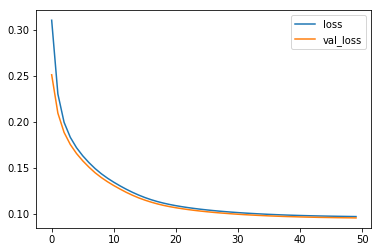

Rendering reconstructions...


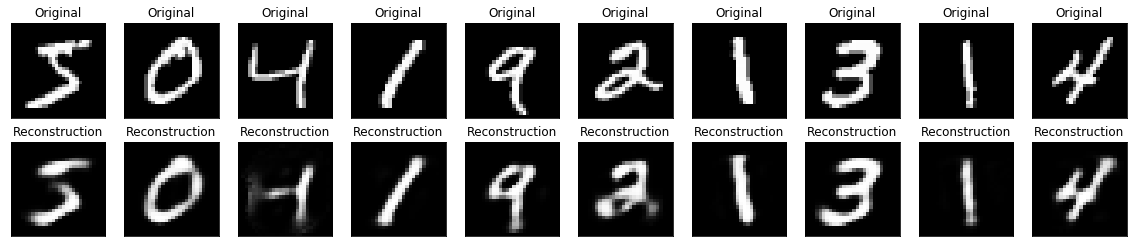

Rendering latent-space...


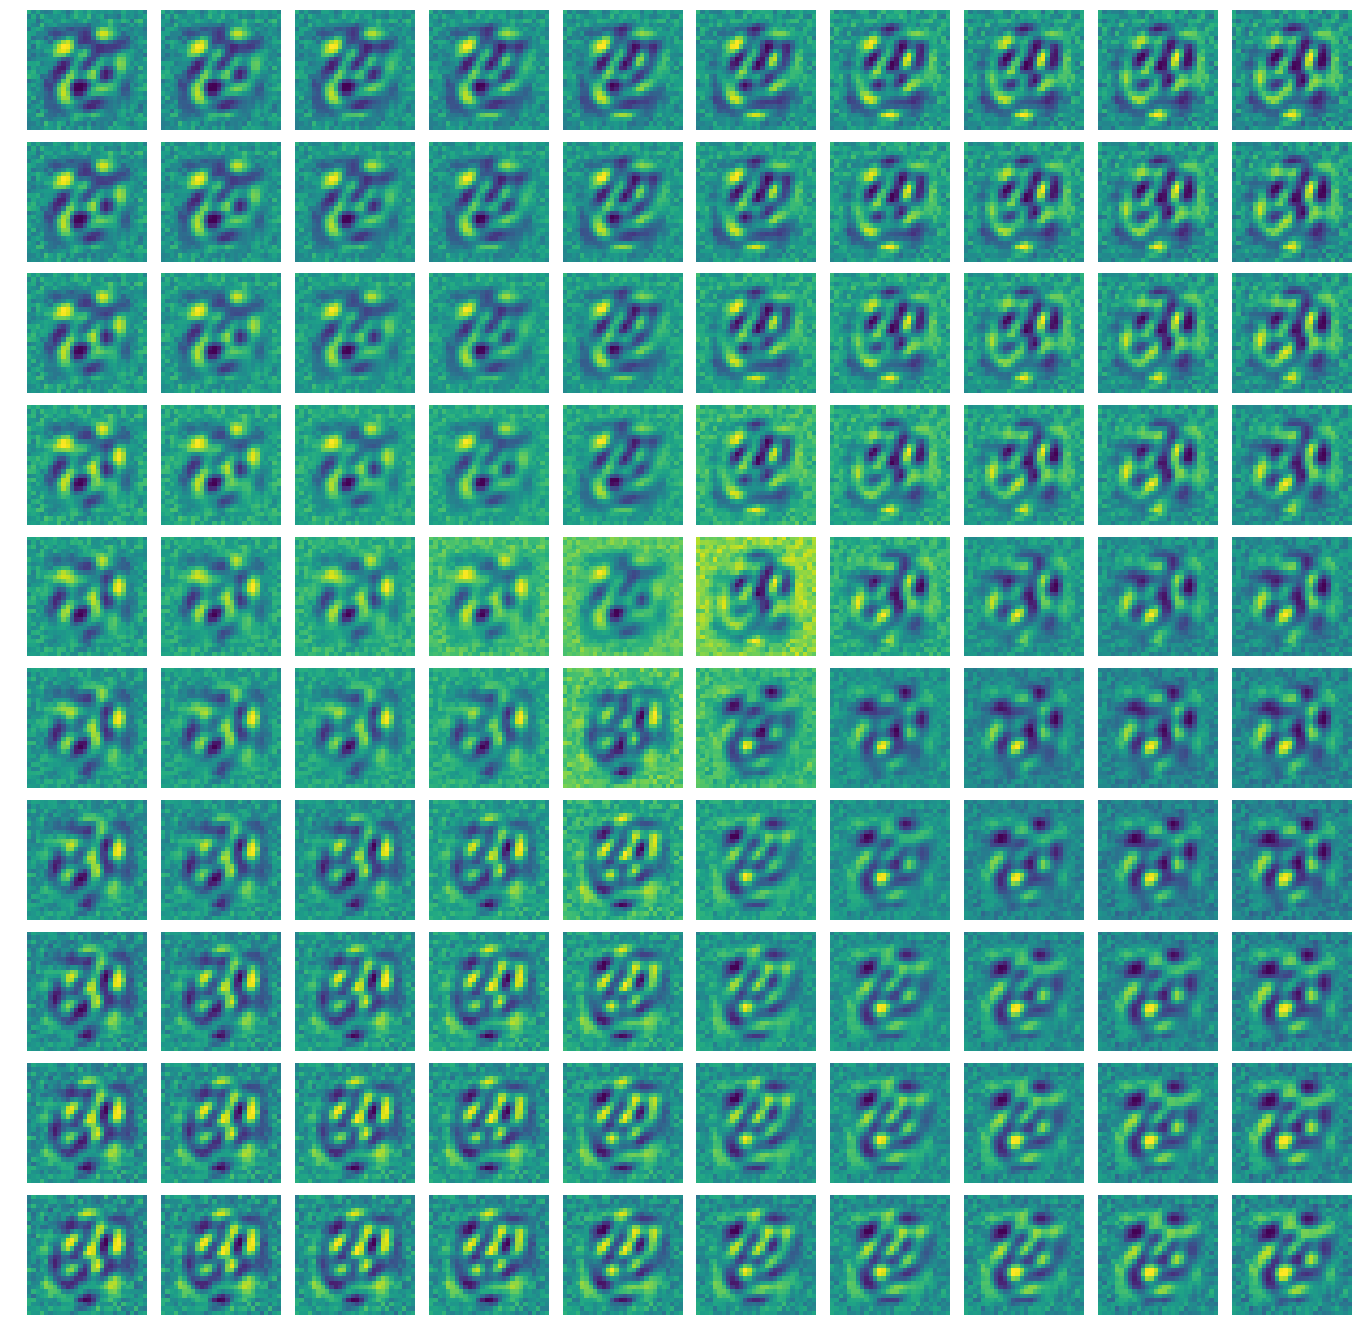

Rendering encodings...


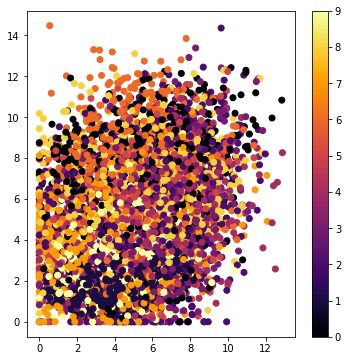

In [4]:
print("Rendering history...")
ngdlutils.render_history(history)

print("Rendering reconstructions...")
ngdlutils.render_image_reconstructions(ae, x_input_train[0:10])

print("Rendering latent-space...")
ngdlutils.render_image_latent_space(ae.decoder, 10)

print("Rendering encodings...")
ngdlutils.render_encodings(ae.encoder, x_input_test, y_output_test)